<a href="https://colab.research.google.com/github/satyareddy1725/Tumor_Segmentation/blob/main/CVProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [11]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/Tumor Segmentation/archive/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [12]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Tumor Segmentation/archive/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [13]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [14]:
result = np.array(result)
result = result.reshape(139,2)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [17]:
y_train.shape

(111, 2)

In [18]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 11s 4s/step - loss: 20.9388 - val_loss: 42.6479
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 11.8545 - val_loss: 8.9132
Epoch 3/30
3/3 [==============================] - 9s 3s/step - loss: 5.8784 - val_loss: 8.9443
Epoch 4/30
3/3 [==============================] - 8s 3s/step - loss: 2.5502 - val_loss: 42.5100
Epoch 5/30
3/3 [==============================] - 8s 2s/step - loss: 2.0671 - val_loss: 21.3312
Epoch 6/30
3/3 [==============================] - 8s 3s/step - loss: 1.8244 - val_loss: 14.1003
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 2.2521 - val_loss: 13.9006
Epoch 8/30
3/3 [==============================] - 11s 4s/step - loss: 1.0073 - val_loss: 14.6423
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 0.4916 - val_loss: 13.4993
Epoch 10/30
3/3 [==============================] - 9s 3s/step - loss: 0.4389 - val_loss: 10.7248
Epoch 11/30
3/3 [====================

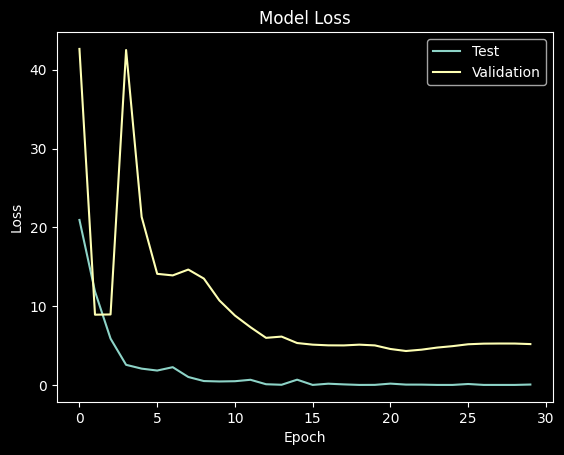

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [20]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


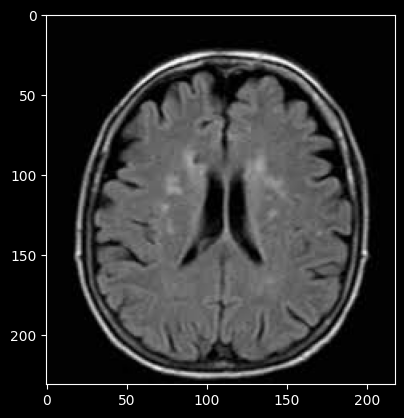

In [21]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Tumor Segmentation/archive/no/17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


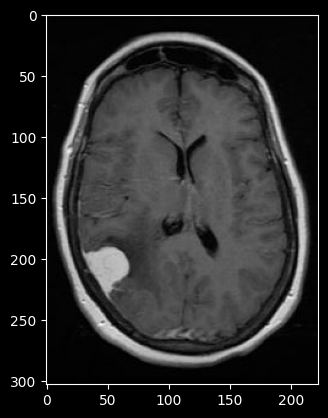

In [22]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Tumor Segmentation/archive/yes/Y165.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))